Tensor("capsule/conv1d_layer/second_layer/Relu:0", shape=(?, 116, 50), dtype=float32)
580.0
--capsules--
Tensor("capsule/primary_caps/Reshape:0", shape=(?, 580, 10), dtype=float32)
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Tensor("capsule/primary_caps/squash_op/mul:0", shape=(?, 580, 10), dtype=float32)
--input_tiled--
Tensor("capsule/digit_caps/input_expand_2:0", shape=(?, 580, 1, 10, 1), dtype=float32)
--input_tiled--
Tensor("capsule/digit_caps/input_tile:0", shape=(?, 580, 2, 10, 1), dtype=float32)
Instructions for updating:
dim is deprecated, use axis instead
--capsules--
Tensor("capsule/digit_caps/Reshape_6:0", shape=(?, 2, 16), dtype=float32)
--capsules--
Tensor("prediction/Sqrt:0", shape=(?, 2), dtype=float32)
Tensor("loss/one_hot:0", dtype=float32)
Tensor("loss/Square:0", shape=(?, 2), dtype=float32)
---------
Variables: name (type shape) [size]
---------
embedding/Variable:0 (float32_ref 3x3) [9, bytes: 36]
embedding/Variable_1:0 (float32_ref 2x2

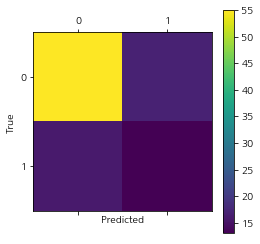

INFO:tensorflow:Restoring parameters from Entity/E_embedding3.ckpt
restore done!!
f1_score: 0.66518891
[[50 22]
 [13 16]]


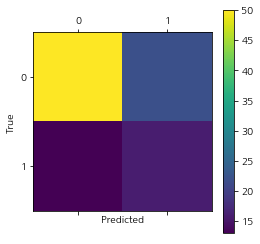

INFO:tensorflow:Restoring parameters from Entity/E_embedding3.ckpt
restore done!!
f1_score: 0.61391520
[[49 23]
 [17 12]]


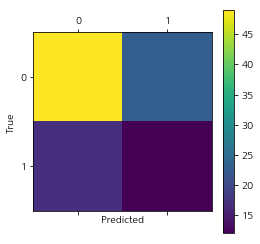

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
import tensorflow.contrib.layers as layers
import random

import os
import numpy as np

from Entity_model import Entity_embedding

import tensorflow as tf
import pickle

def main(_):
    run_config = tf.ConfigProto()
    run_config.gpu_options.allow_growth=True
    with tf.Session(config=run_config) as sess:
        
        # Data의 categorical한 부분의 크기를 알아야하므로 미리 만들어놓은 data를 읽어온다.
        with open('unique_data.pickle','rb') as f:
            reader = pickle.load(f)
            table_all = np.array(reader)

        entity_size = table_all
        
        Entity = Entity_embedding(sess, input_size=61, input_size_con=45, entity_size=entity_size[0], n_digit=2, batch_size = 20)
    
        model_vars = tf.trainable_variables()
        slim.model_analyzer.analyze_vars(model_vars, print_info=True)

        # ---------------------Training----------------------
         # Training 실행 시 주석을 제거하고 실행
        
        Entity.train(0)
        Entity.validation_check(restore=0)
        Entity.save('Entity', 'E_embedding3')
        # -----------------------End-------------------------
    

        # ---------------------Testing-----------------------
        Entity.plot_confusion_matrix(check=0, restore=1) # Entity embedding with Randomforest
        Entity.plot_confusion_matrix(check=1, restore=1) # Entity embedding with CapsuleNet
        Entity.plot_confusion_matrix(check=2, restore=1) # Randomforest
#         Entity.visualization()
        # -----------------------End-------------------------
        
if __name__ == '__main__':
    main(_)